In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import tensorflow as tf
from tensorflow.keras import models, layers
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data_dir ='C:/Users/MRITH/OneDrive/Documents/DL/CNN_Image_Detection_Rithvik/Lung X-Ray Image/Lung X-Ray Image/'
categories=['Lung_Opacity','Normal','Viral Pneumonia']

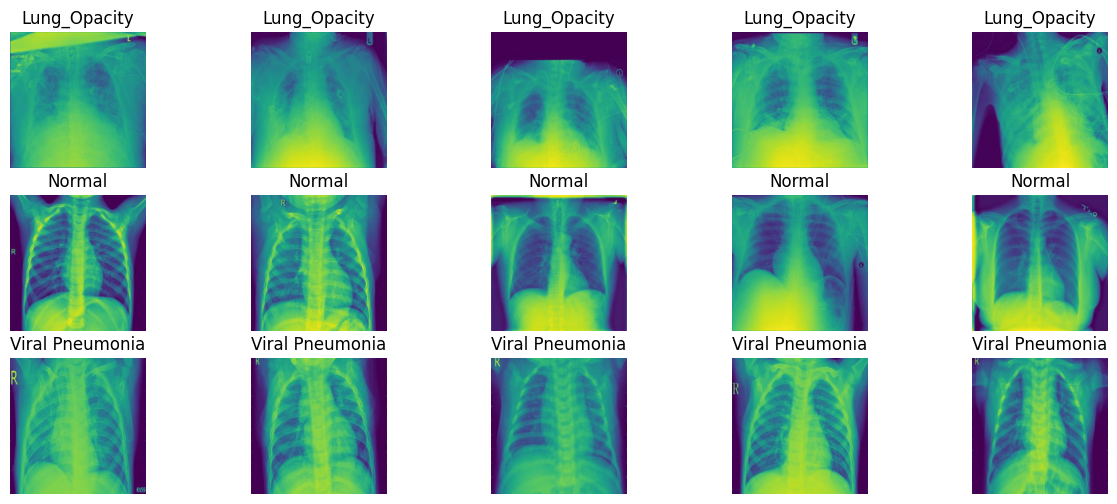

In [4]:
index=0
fig, axes = plt.subplots(3, 5, figsize=(15, 6))
axes=axes.flatten()
for category in os.listdir(data_dir):
    if index>=15:
        break
    category_folder=os.path.join(data_dir,category)
    images=os.listdir(category_folder)
    for i in range(5):
        image_name=np.random.choice(images)
        image_path=os.path.join(category_folder,image_name)
        image_read=cv2.imread(image_path)
        resized_image = cv2.resize(image_read, (200, 200)) 
        resized_image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
        axes[index].imshow(resized_image_rgb)
        axes[index].set_title(category)
        axes[index].axis('off')
        index+=1
        if index>=15:
            break
plt.show()

In [5]:
df=pd.DataFrame(columns=['Image_URL','Label'])

In [6]:
for category in os.listdir(data_dir):
    categoryfolder=os.path.join(data_dir,category)
    for img in os.listdir(categoryfolder):
        imgpath=os.path.join(categoryfolder,img)
        df.loc[len(df)]=[imgpath,category]

In [7]:
df.head(10)

,Image_URL,Label
0,C:/Users/MRITH/OneDrive/Documents/DL/CNN_Image...,Lung_Opacity
1,C:/Users/MRITH/OneDrive/Documents/DL/CNN_Image...,Lung_Opacity
2,C:/Users/MRITH/OneDrive/Documents/DL/CNN_Image...,Lung_Opacity
3,C:/Users/MRITH/OneDrive/Documents/DL/CNN_Image...,Lung_Opacity
4,C:/Users/MRITH/OneDrive/Documents/DL/CNN_Image...,Lung_Opacity
5,C:/Users/MRITH/OneDrive/Documents/DL/CNN_Image...,Lung_Opacity
6,C:/Users/MRITH/OneDrive/Documents/DL/CNN_Image...,Lung_Opacity
7,C:/Users/MRITH/OneDrive/Documents/DL/CNN_Image...,Lung_Opacity
8,C:/Users/MRITH/OneDrive/Documents/DL/CNN_Image...,Lung_Opacity
9,C:/Users/MRITH/OneDrive/Documents/DL/CNN_Image...,Lung_Opacity


In [8]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df.Label)

In [9]:
train_df.shape

(2780, 2)

In [10]:
IMG_SIZE=200
BATCH_SIZE=45

train_datagen = ImageDataGenerator(
    rescale=1./255,                
    rotation_range=20,             
    width_shift_range=0.2,         
    height_shift_range=0.2,        
    shear_range=0.2,               
    zoom_range=0.2,                
    horizontal_flip=True,          
    fill_mode='nearest'            
)

test_datagen = ImageDataGenerator(
    rescale=1./255                 
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Image_URL',             
    y_col='Label',                 
    target_size=(IMG_SIZE, IMG_SIZE),#check image scaling function
    class_mode='categorical',      
    batch_size=BATCH_SIZE          
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='Image_URL',             
    y_col='Label',                 
    target_size=(IMG_SIZE, IMG_SIZE),  
    class_mode='categorical',      
    batch_size=BATCH_SIZE          
)

Found 2780 validated image filenames belonging to 3 classes.
Found 695 validated image filenames belonging to 3 classes.


In [11]:
from tensorflow import keras
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
# for layer in base_model.layers:
#     layer.trainable = False
# x = base_model.output
# x = keras.layers.Flatten()(x)
# x = keras.layers.Dense(128, activation='relu')(x)
# x = keras.layers.Dropout(0.5)(x)
# predictions = keras.layers.Dense(3, activation='softmax')(x)

# model = keras.models.Model(inputs=base_model.input, outputs=predictions)
model=keras.models.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),input_shape=(IMG_SIZE,IMG_SIZE,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3,activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 37s 1us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 200, 200, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 200, 200, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 100, 100, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 100, 100, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 100, 100, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 50, 50, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 50, 50, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 25, 25, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 25, 25, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 25, 25, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 12, 12, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 17,074,499 (65.13 MB)

 Trainable params: 2,359,811 (9.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [15]:
history=model.fit(train_generator,epochs=10,batch_size=BATCH_SIZE,callbacks=[early_stopping])

Epoch 1/10


C:\Users\MRITH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 869s 14s/step - accuracy: 0.5405 - loss: 1.3224
Epoch 2/10


C:\Users\MRITH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 895s 13s/step - accuracy: 0.7893 - loss: 0.5342
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 884s 14s/step - accuracy: 0.7878 - loss: 0.5140
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 960s 15s/step - accuracy: 0.7851 - loss: 0.5160
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 950s 15s/step - accuracy: 0.7957 - loss: 0.4757
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 728s 11s/step - accuracy: 0.7983 - loss: 0.4769
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 755s 12s/step - accuracy: 0.8218 - loss: 0.4253
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 553s 9s/step - accuracy: 0.7821 - loss: 0.4706
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 311s 5s/step - accuracy: 0.8179 - loss: 0.4545
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 758s 12s/step - accuracy: 0.8281 - loss: 0.4069


In [16]:
true_value=test_generator.classes
pred=model.predict(test_generator)
pred=np.argmax(model.predict(test_generator),axis=1)
pred_class_name=[categories[p] for p in pred]
pred_class_name

16/16 ━━━━━━━━━━━━━━━━━━━━ 79s 5s/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 86s 5s/step


['Lung_Opacity',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Viral Pneumonia',
 'Normal',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Normal',
 'Lung_Opacity',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Normal',
 'Viral Pneumonia',
 'Lung_Opacity',
 'Lung_Opacity',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Normal',
 'Normal',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Viral Pneumonia',
 'Lung_Opacity',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Lung_Opacity',
 'Viral Pneumonia',
 'Lung_Opacity',
 'Viral Pneumonia',
 'Normal',
 'Lung_Opacity',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Lung_Opacity',
 'Lung_Opacity',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Viral Pneumonia',
 'Lung_Opacity',
 'Normal',
 'Normal',
 'Lung_Opacity',
 'Lung_Opacity',
 'Lung_Opacity',
 'Normal',
 'Viral Pneumonia',
 'Normal',
 'Normal',
 'Lung_Op

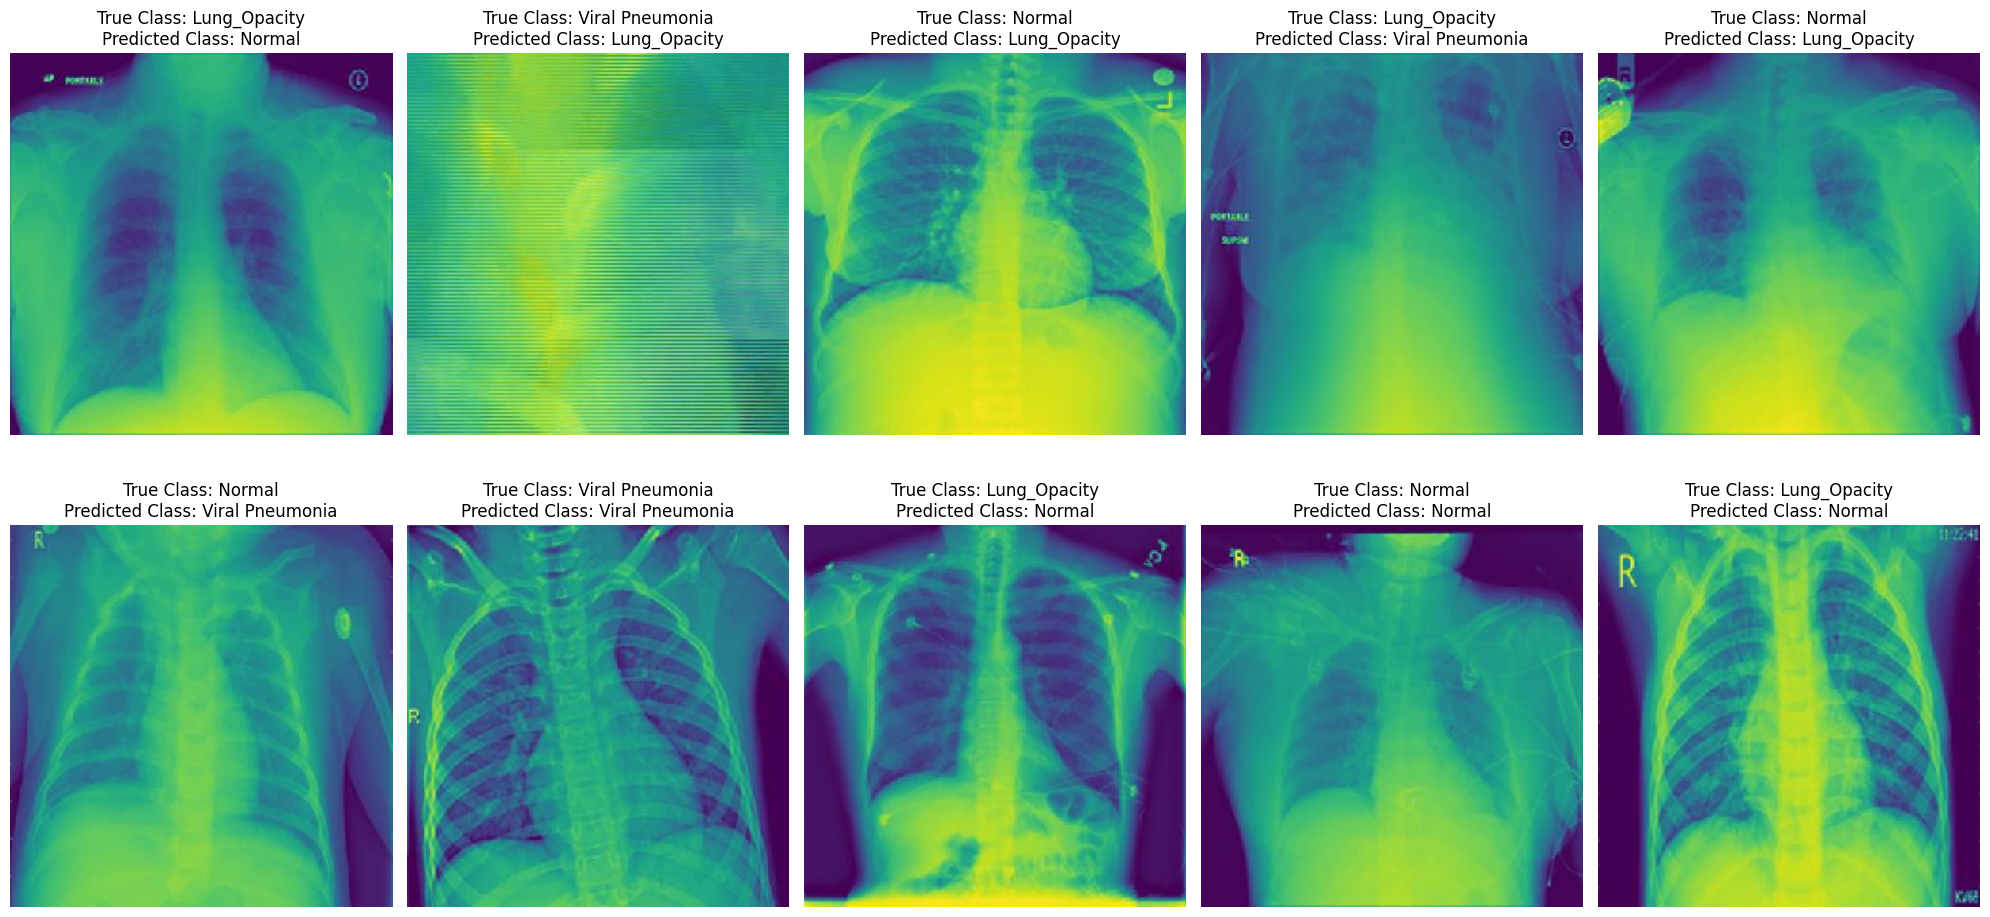

In [18]:
plt.figure(figsize=(20, 10))
random_indices = np.random.choice(len(test_generator), size=10, replace=False)
for idx, i in enumerate(random_indices):
    plt.subplot(2, 5, idx + 1)
    plt.imshow(test_generator[i][0][0])
    plt.title(f"True Class: {categories[true_value[i]]}\nPredicted Class: {pred_class_name[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()